In [6]:
import torch
import torch.nn as nn
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


<IPython.core.display.Javascript object>


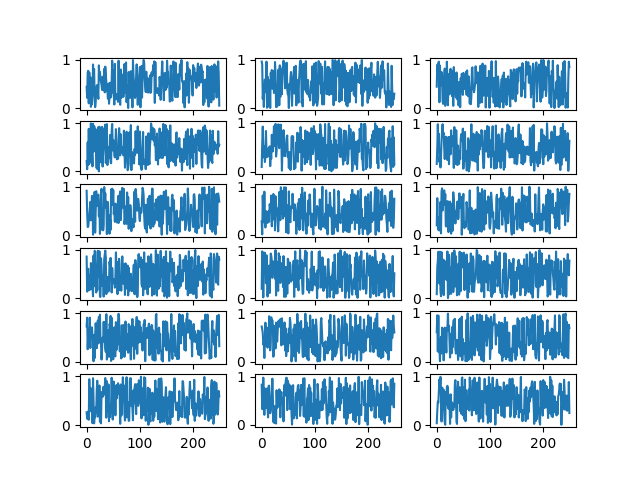

In [7]:
def seeg_plot(seeg):
    seq_len = seeg.shape[-1]
    x = np.linspace(0, seq_len - 1, seq_len)
    for index, channel in enumerate(seeg[0]):
        plt.subplot(6, 3, 0 + index + 1)
        plt.plot(x, channel)
        if index == 17:
            break
    plt.show()


def test():
    seeg_raw_data = torch.rand(1, 92, 250)

    seeg_plot(seeg_raw_data)
    
test()